In [2]:
#import opendatasets as od
 
#od.download(
    #"https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata"
#)

Skipping, found downloaded files in ".\airbnbopendata" (use force=True to force download)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gc
%matplotlib inline
#seaborn style
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
sns.set_theme(style="darkgrid")
plt.rcParams.update({'figure.figsize': (15,10)})
path = r"E:\airbnb project\airbnbopendata\Airbnb_Open_Data.csv"
df = pd.read_csv(path)

C:\Users\mohamedmeqlad\AppData\Local\Temp\ipykernel_14408\1944314561.py:21: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


In [4]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [2]:
df.shape

(102599, 26)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [4]:
df.isnull().sum().sort_values(ascending=False)

license                           102597
house_rules                        52131
last review                        15893
reviews per month                  15879
country                              532
availability 365                     448
minimum nights                       409
host name                            406
review rate number                   326
calculated host listings count       319
host_identity_verified               289
service fee                          273
NAME                                 250
price                                247
Construction year                    214
number of reviews                    183
country code                         131
instant_bookable                     105
cancellation_policy                   76
neighbourhood group                   29
neighbourhood                         16
long                                   8
lat                                    8
id                                     0
host id         

<Axes: ylabel='count'>

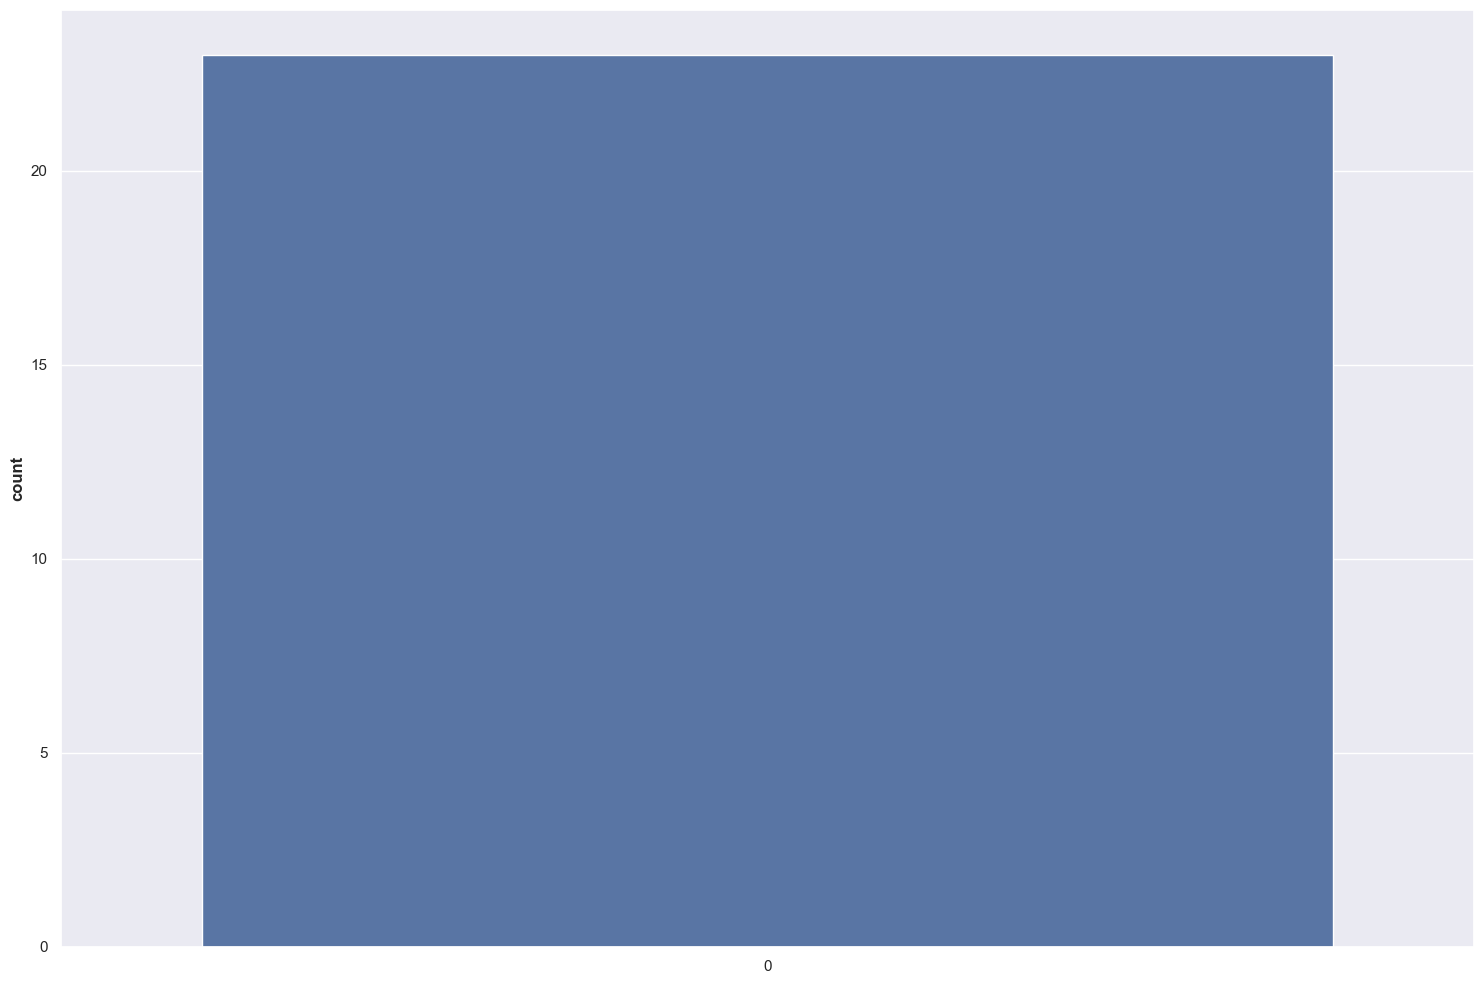

In [9]:
sns.countplot(x=df.isnull().sum().value_counts())

In [8]:
df.loc[~df.license.isnull()]

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
11114,7139598,"Cozy 1 BR on Bedford Avenue, Wburg",73023181304,verified,Christina,Brooklyn,Williamsburg,40.71764,-73.95689,United States,...,$140,1.0,1.0,1/3/2016,0.02,1.0,1.0,191.0,"Dear Guest, Thank you for appreciating that I ...",41662/AL
72947,41289964,"Cozy 1 BR on Bedford Avenue, Wburg",25804773951,unconfirmed,Christina,Brooklyn,Williamsburg,40.71764,-73.95689,United States,...,$140,1.0,1.0,1/3/2016,0.02,1.0,1.0,0.0,NaN,41662/AL


In [9]:
df.drop(df.index[72947], inplace=True)

In [10]:
df.drop('license', axis=1, inplace=True)

In [11]:
df.loc[df.house_rules.isnull(), 'house_rules'] = 'blank'

In [12]:
df['last review']

0         10/19/2021
1          5/21/2022
2                NaN
3           7/5/2019
4         11/19/2018
             ...    
102594           NaN
102595      7/6/2015
102596           NaN
102597    10/11/2015
102598           NaN
Name: last review, Length: 102598, dtype: object

In [13]:
df['last review'] = pd.to_datetime(df['last review'])

In [14]:
df['last review'].min(), df['last review'].max()

(Timestamp('2012-07-11 00:00:00'), Timestamp('2058-06-16 00:00:00'))

In [15]:
df[df['last review'].apply(lambda x: x.year) > 2023]

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
127,1071478,Garden studio in the Upper East Sid,77172555024,unconfirmed,Miller,Manhattan,Upper East Side,40.77800,-73.94822,United States,...,$571,$114,5.0,21.0,2024-08-15,0.19,4.0,NaN,395.0,"Dear Guests, Welcome to 62 Cornwall St! I hope..."
191,1106825,LUX APT IN TIMES SQUARE NEW BUILDING,93725364475,unconfirmed,Aiden,Manhattan,Hell's Kitchen,40.76307,-73.99665,United States,...,$539,$108,NaN,41.0,2025-06-26,0.38,2.0,1.0,NaN,"You will be sharing a bathroom, so you must be..."
255,1142173,Beautiful Landmarked Duplex,87944779917,NaN,Baker,Brooklyn,Greenpoint,40.72945,-73.95511,United States,...,$842,$168,3.0,124.0,2058-06-16,1.22,4.0,3.0,230.0,No rules per say. I just ask that you respect ...
318,1176967,NaN,70084472212,verified,Barnes,Brooklyn,Greenpoint,40.72488,-73.95018,United States,...,$920,$184,2.0,1.0,2026-03-28,0.01,3.0,1.0,73.0,Check-In is 3pm. Check-Out is 12 Noon. In or...
483,1268097,Modern Space in Charming Pre-war,13746585241,verified,Adelaide,Manhattan,Harlem,40.82411,-73.94934,United States,...,$721,$144,2.0,41.0,2040-06-16,0.43,3.0,2.0,47.0,blank


In [16]:
df.loc[df[df['last review'].apply(lambda x: x.year) > 2022].index, 'last review'] = df['last review'].median()

In [17]:
df.loc[df['last review'].isnull(), 'last review'] = df['last review'].median()

In [18]:
df.drop_duplicates(keep='first', inplace=True)

In [19]:
df.drop_duplicates(subset=['host name', 'lat', 'long', 'price'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69305 entries, 0 to 102050
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              69305 non-null  int64         
 1   NAME                            69097 non-null  object        
 2   host id                         69305 non-null  int64         
 3   host_identity_verified          69088 non-null  object        
 4   host name                       68992 non-null  object        
 5   neighbourhood group             69276 non-null  object        
 6   neighbourhood                   69289 non-null  object        
 7   lat                             69297 non-null  float64       
 8   long                            69297 non-null  float64       
 9   country                         68982 non-null  object        
 10  country code                    69219 non-null  object        
 11  instan

In [20]:
df.isnull().sum().sort_values(ascending=False)

reviews per month                 10814
availability 365                    438
minimum nights                      363
country                             323
host name                           313
price                               245
service fee                         241
review rate number                  239
host_identity_verified              217
NAME                                208
Construction year                   190
number of reviews                   152
calculated host listings count      144
country code                         86
instant_bookable                     86
cancellation_policy                  57
neighbourhood group                  29
neighbourhood                        16
long                                  8
lat                                   8
id                                    0
last review                           0
room type                             0
host id                               0
house_rules                           0


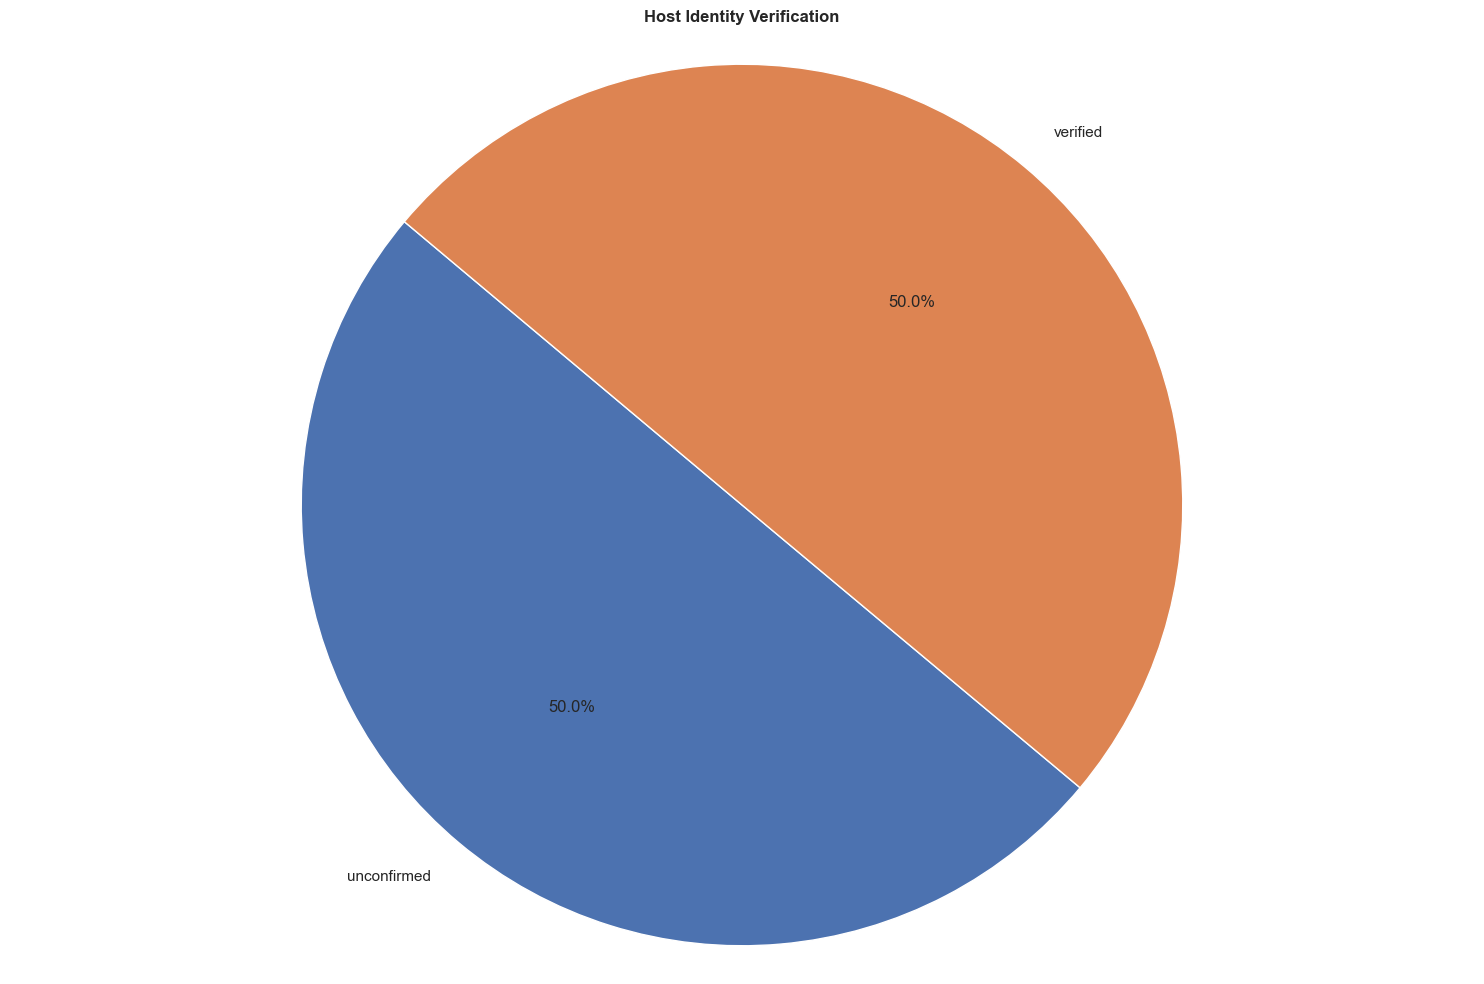

In [21]:
value_counts = df['host_identity_verified'].value_counts()
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Host Identity Verification')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

In [22]:
result = df.groupby('neighbourhood')['host name'].count()
sorted_result = result.sort_values(ascending=False)
sorted_resultDF = pd.DataFrame(sorted_result)
sorted_resultDF

,host name
neighbourhood,
Bedford-Stuyvesant,5306
Williamsburg,5056
Harlem,3635
Bushwick,3257
Hell's Kitchen,2803
...,...
Glen Oaks,2
Lighthouse Hill,2
Woodrow,2


In [23]:
df['calculated host listings count'].mean()

8.993363311693006

In [24]:
book = df['instant_bookable'].value_counts()
bookDF = pd.DataFrame(book)
bookDF.columns = ['count']
bookDF

,count
instant_bookable,
False,34867
True,34352


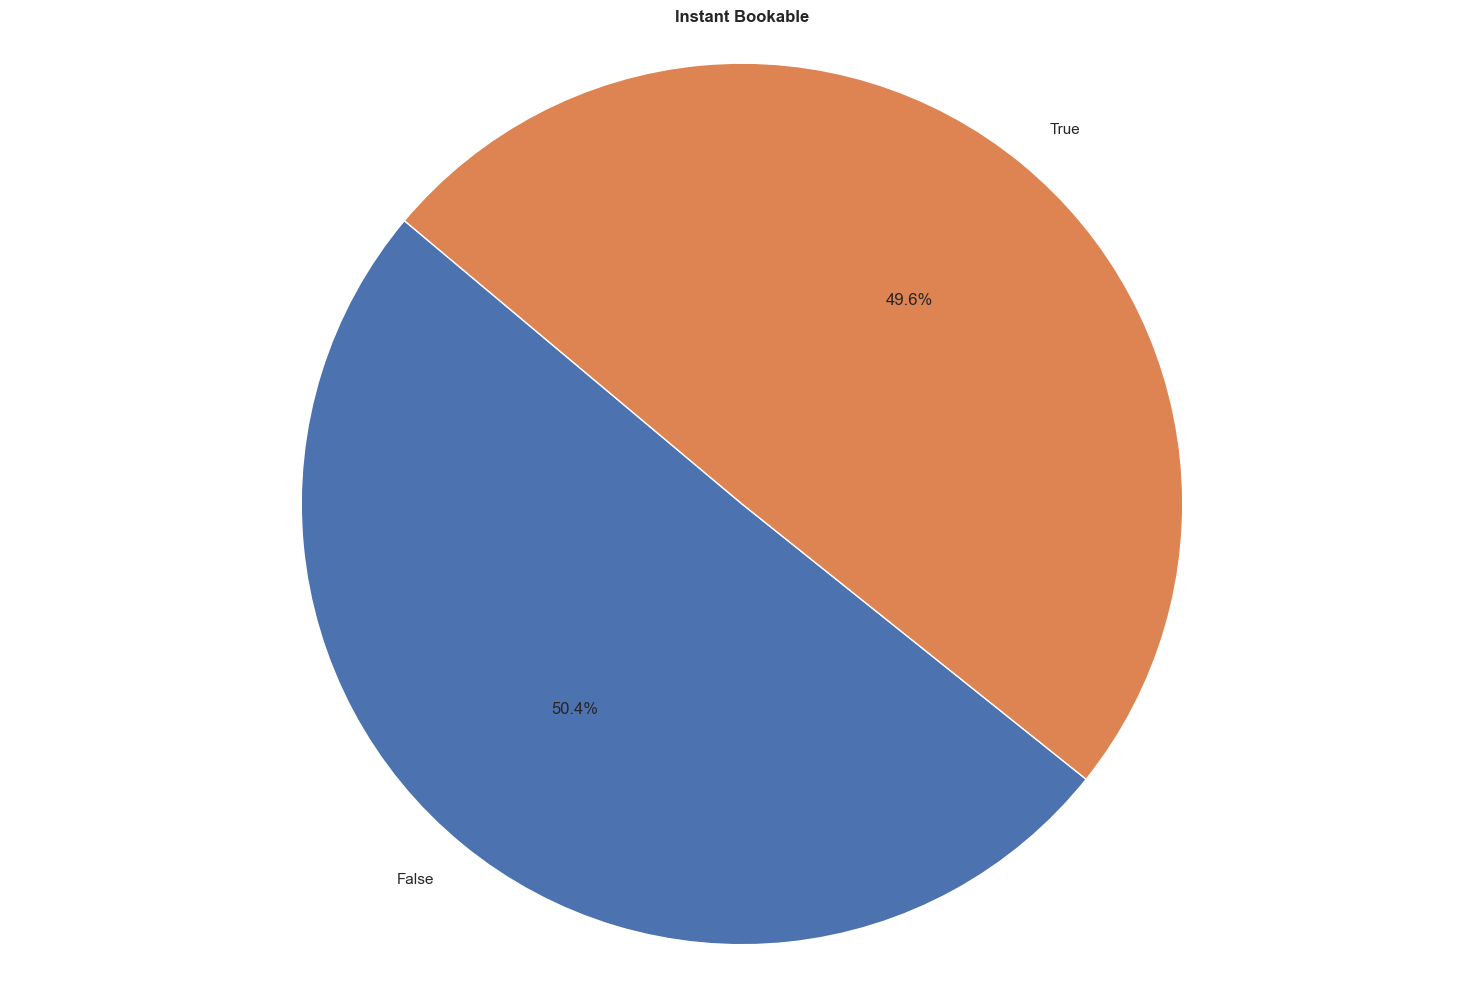

In [25]:
plt.pie(bookDF['count'], labels=bookDF.index, autopct='%1.1f%%', startangle=140)
plt.title('Instant Bookable')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

In [26]:
cancellation_policy = df['cancellation_policy'].value_counts()
cancellation_policyDF = pd.DataFrame(cancellation_policy)
cancellation_policyDF.columns = ['count']
cancellation_policyDF

,count
cancellation_policy,
moderate,23187
flexible,23126
strict,22935


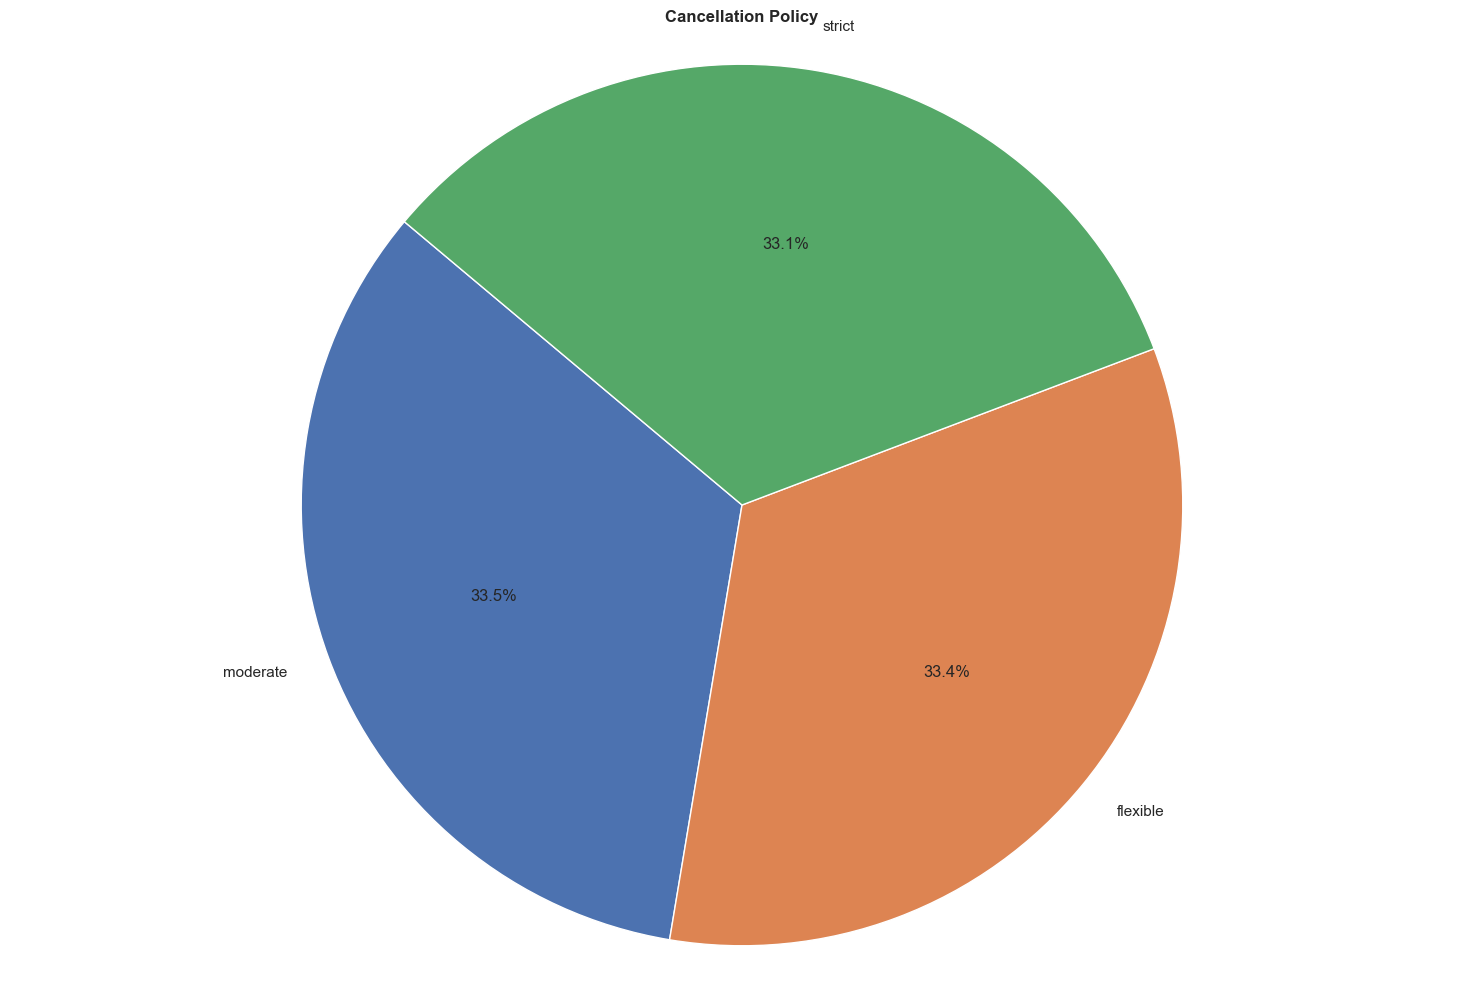

In [27]:
plt.pie(cancellation_policyDF['count'], labels=cancellation_policyDF.index, autopct='%1.1f%%', startangle=140)
plt.title('Cancellation Policy')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

In [28]:
room = df['room type'].value_counts()
roomDF = pd.DataFrame(room)
roomDF

,count
room type,
Entire home/apt,37212
Private room,30508
Shared room,1470
Hotel room,115


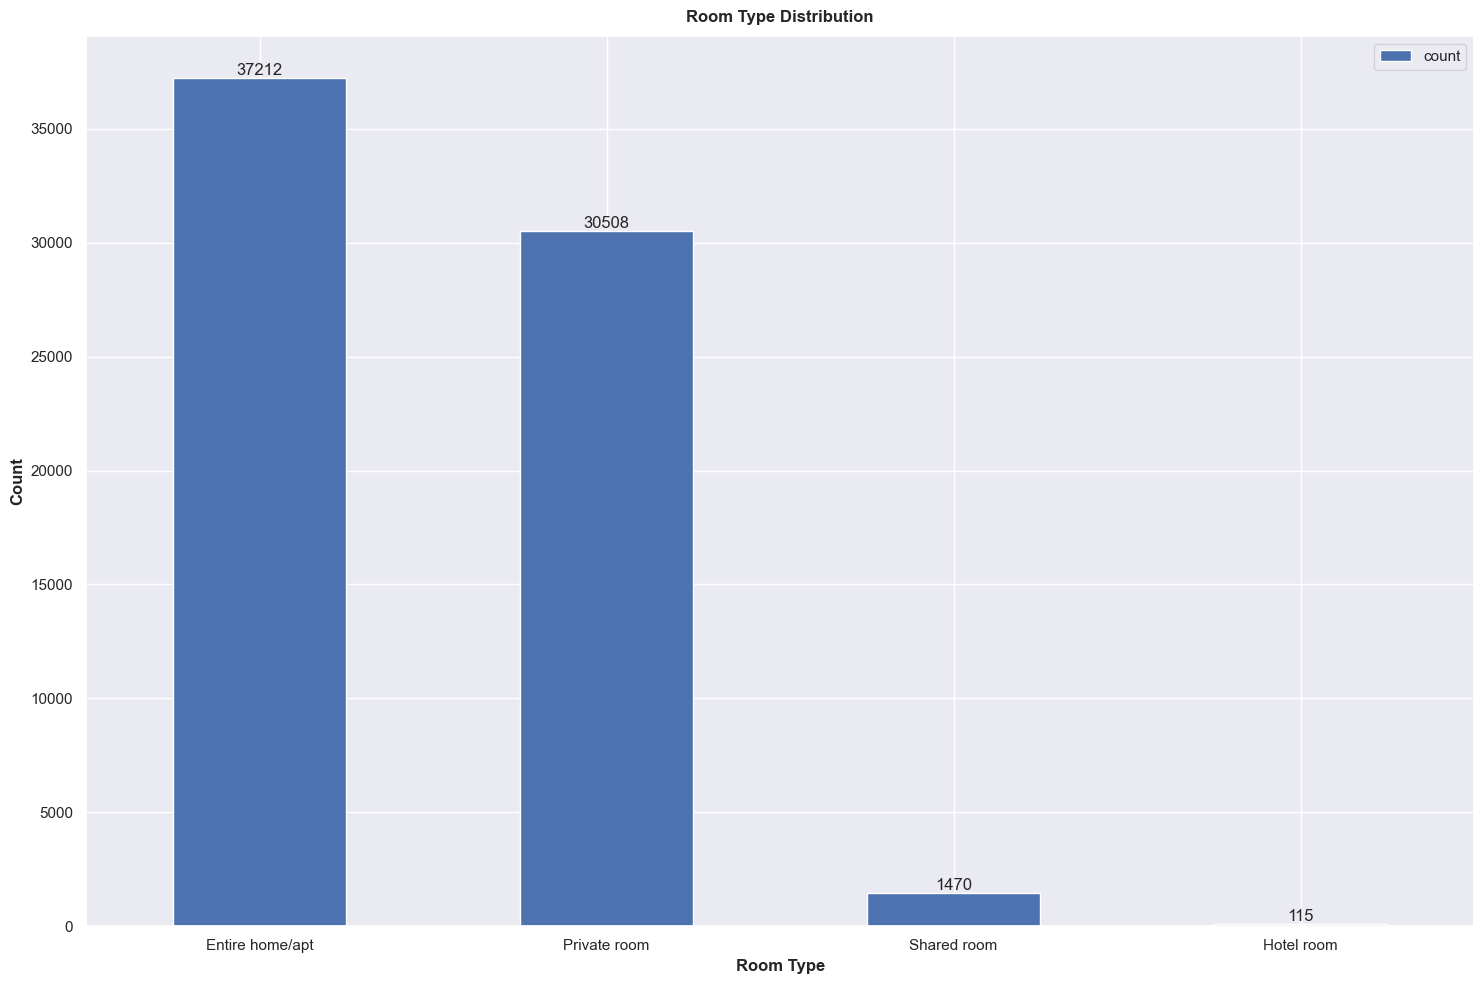

In [29]:
room = df['room type'].value_counts()
roomDF = pd.DataFrame(room)
ax = roomDF.plot(kind='bar')
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

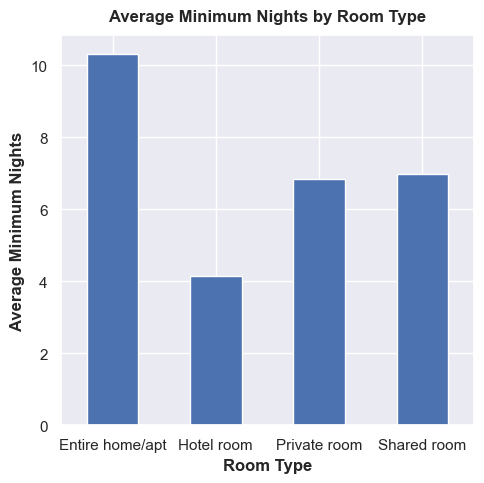

In [30]:
grouped_by_room = df.groupby('room type')['minimum nights'].mean()

# Create a bar graph
plt.figure(figsize=(5, 5))
grouped_by_room.plot(kind='bar')
plt.title('Average Minimum Nights by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Minimum Nights')
plt.xticks(rotation=0)
plt.show()

In [31]:
df.groupby('neighbourhood group')['minimum nights'].mean()

neighbourhood group
Bronx             5.021008
Brooklyn          7.933021
Manhattan        10.252058
Queens            7.070600
Staten Island     6.927132
brookln           4.000000
manhatan          1.000000
Name: minimum nights, dtype: float64

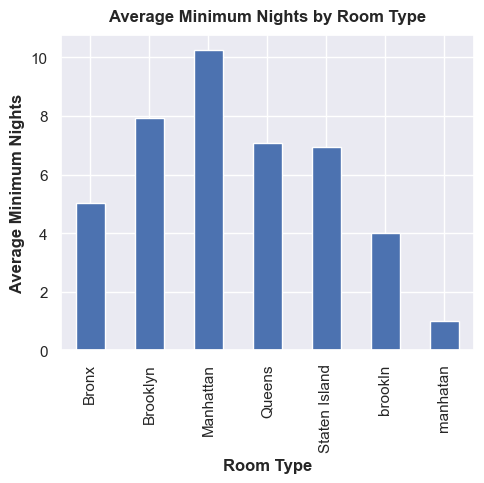

In [32]:
grouped_by_room = df.groupby('neighbourhood group')['minimum nights'].mean()

# Create a bar graph
plt.figure(figsize=(5, 5))
grouped_by_room.plot(kind='bar')
plt.title('Average Minimum Nights by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Minimum Nights')
plt.xticks(rotation=90)
plt.show()

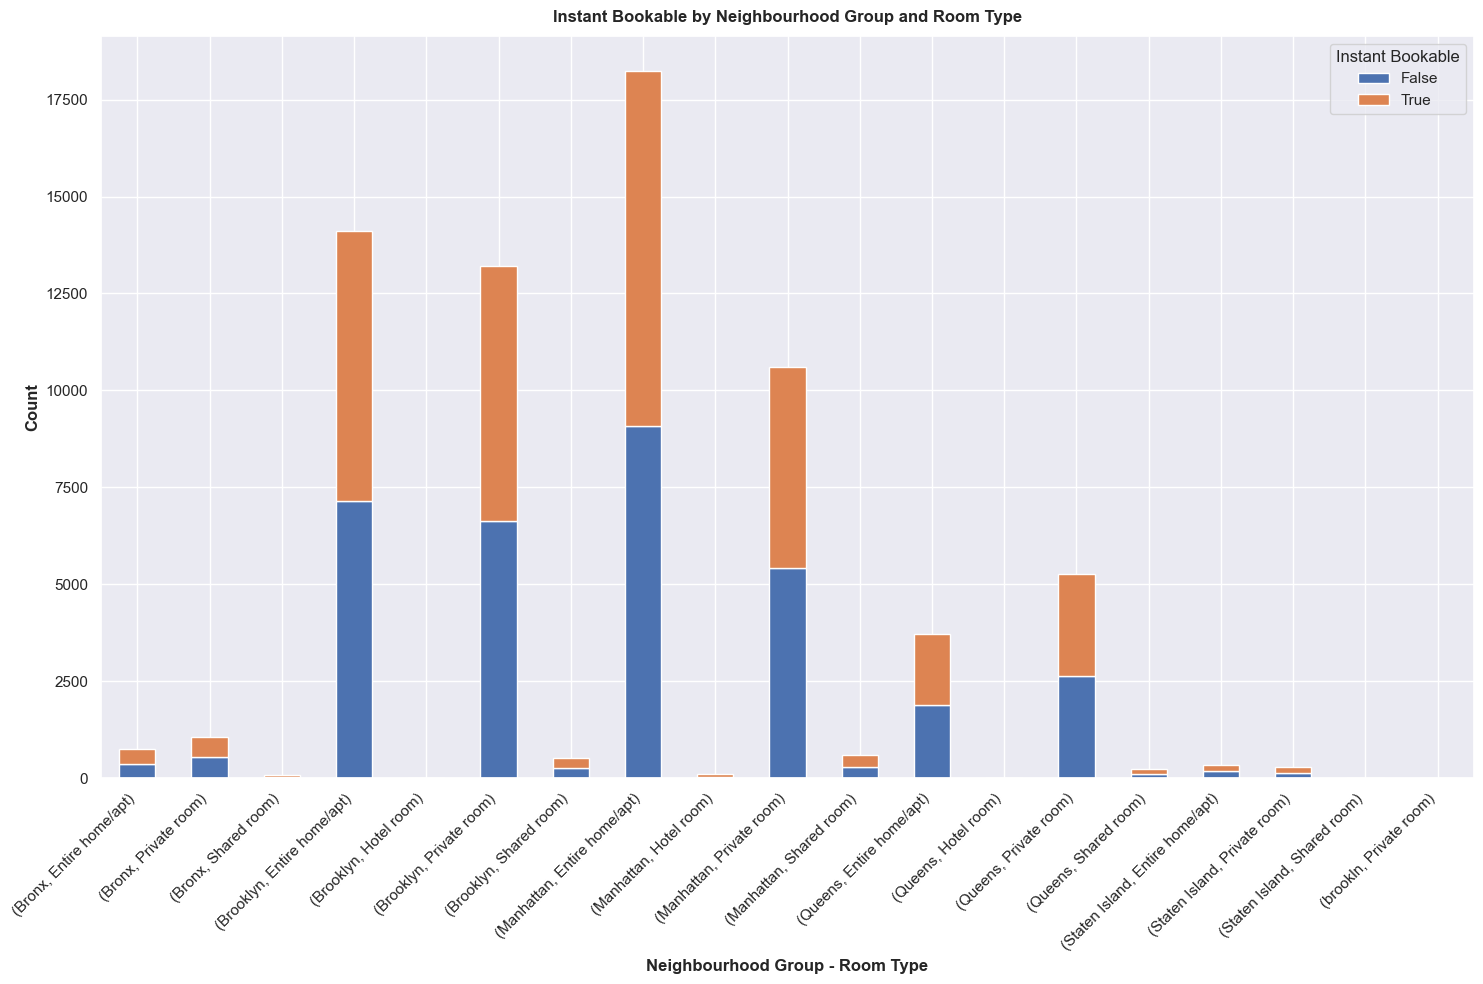

In [33]:
instant = df.groupby(['neighbourhood group', 'room type', 'instant_bookable'])['instant_bookable'].count()
instantDF = pd.DataFrame(instant)
instantDF.columns = ['count']
instant_pivot = instantDF.pivot_table(index=['neighbourhood group', 'room type'], columns='instant_bookable', values='count', fill_value=0)
ax = instant_pivot.plot(kind='bar', stacked=True)
plt.title('Instant Bookable by Neighbourhood Group and Room Type')
plt.xlabel('Neighbourhood Group - Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Instant Bookable')
plt.tight_layout()
plt.show()

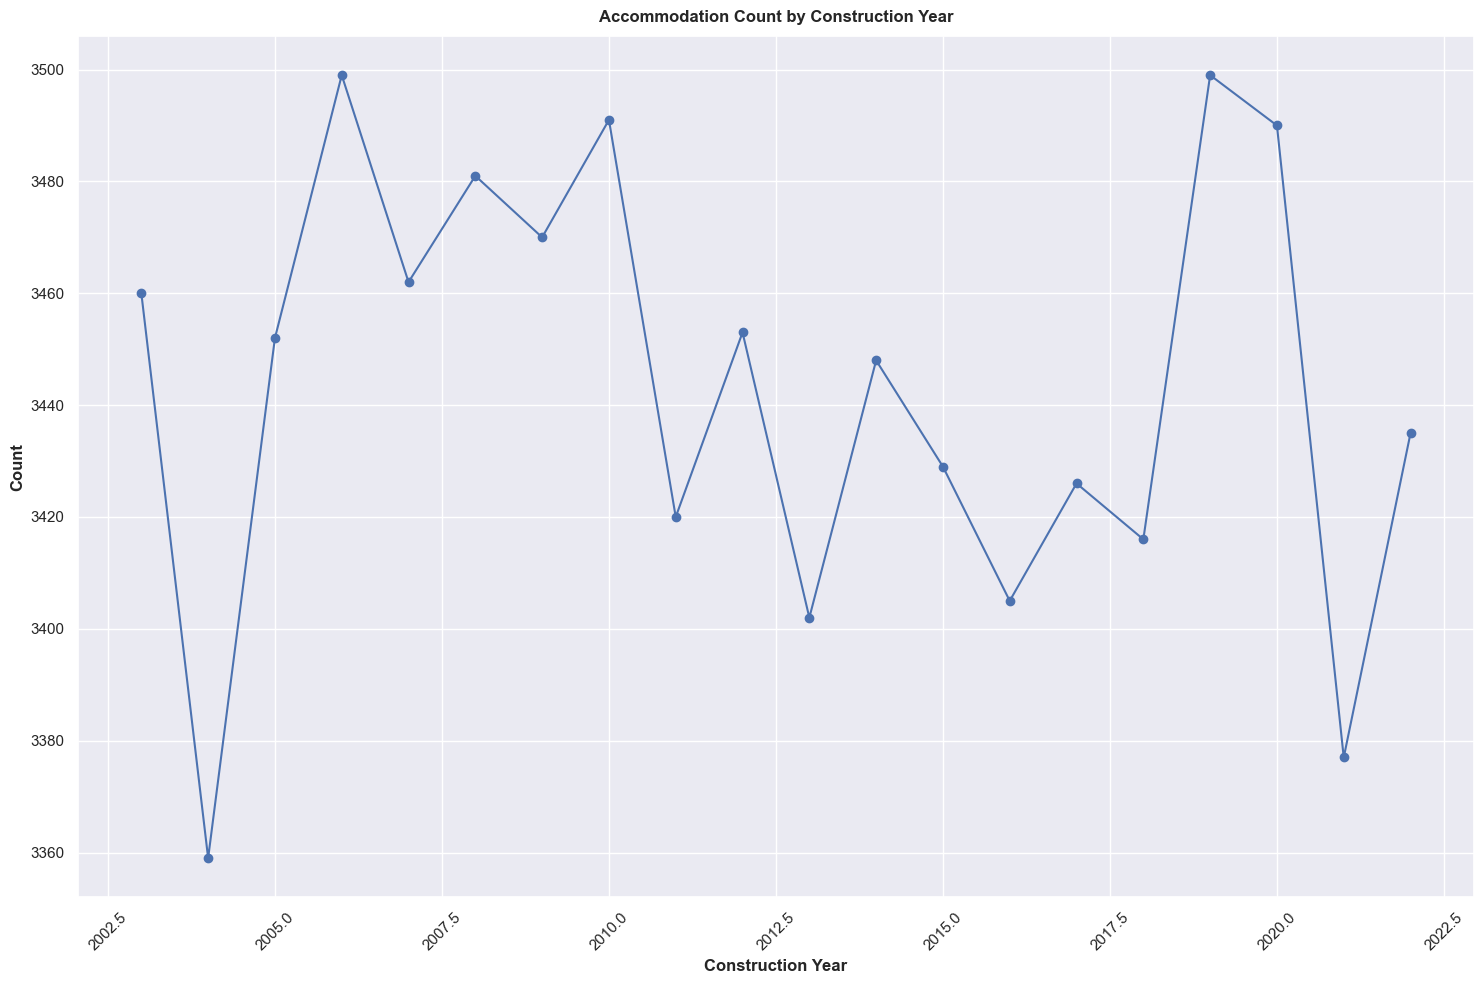

In [34]:
construction_year_count = df.groupby('Construction year')['price'].count()
construction_year_count.plot(kind='line', marker='o')
plt.title('Accommodation Count by Construction Year')
plt.xlabel('Construction Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

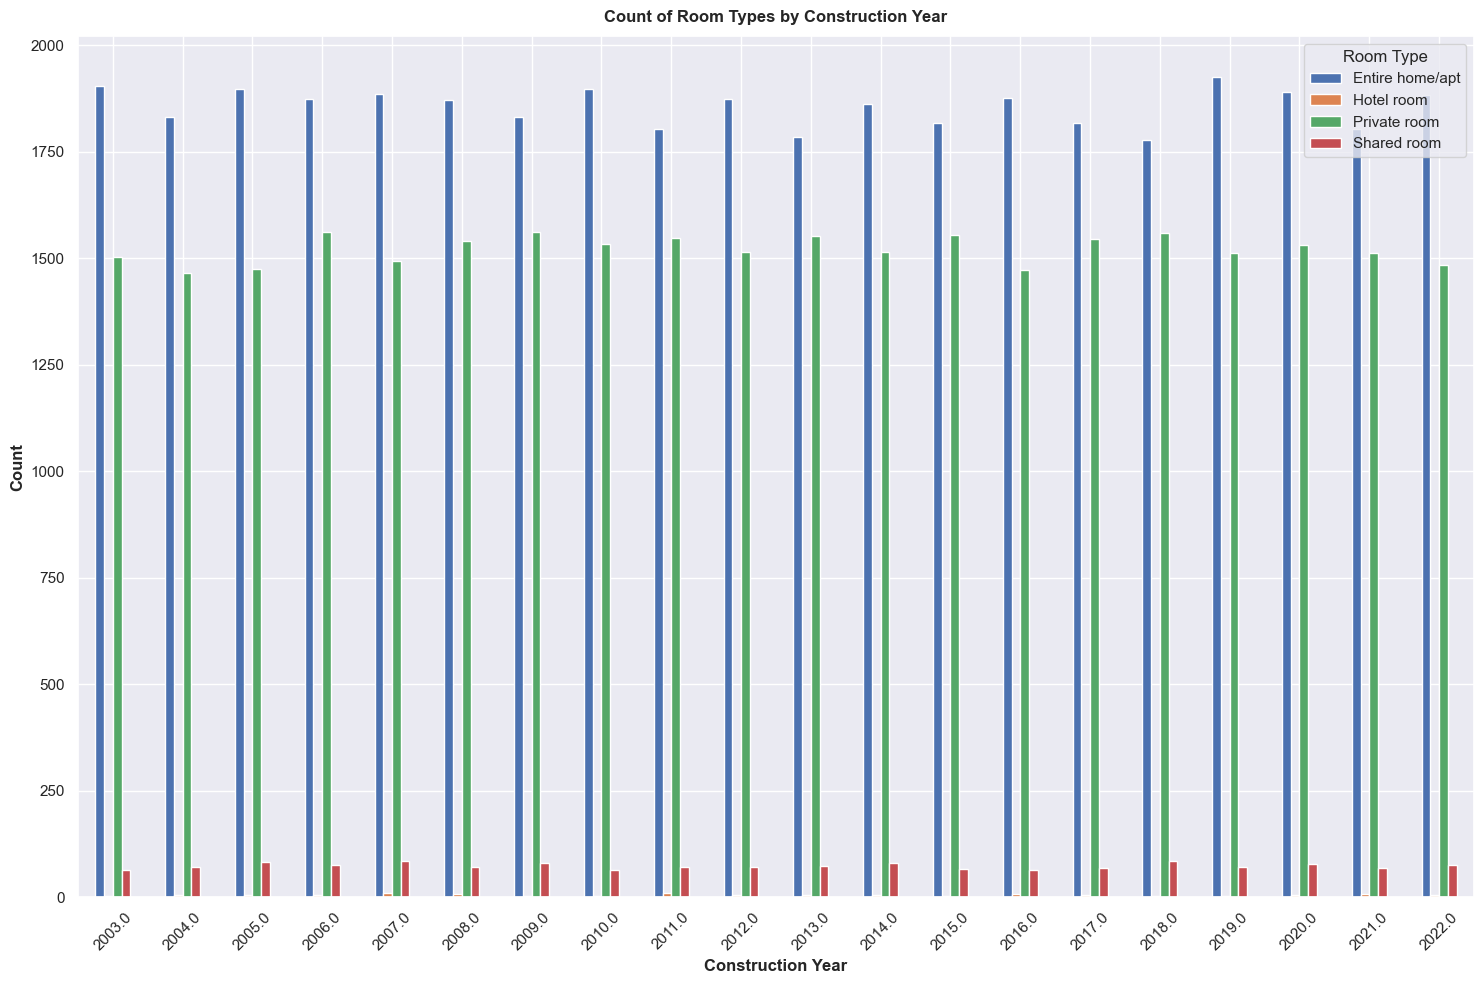

In [35]:
room_counts = df.groupby(['Construction year', 'room type'])['room type'].count().unstack()
room_counts.plot(kind='bar')
plt.title('Count of Room Types by Construction Year')
plt.xlabel('Construction Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Room Type')
plt.show()

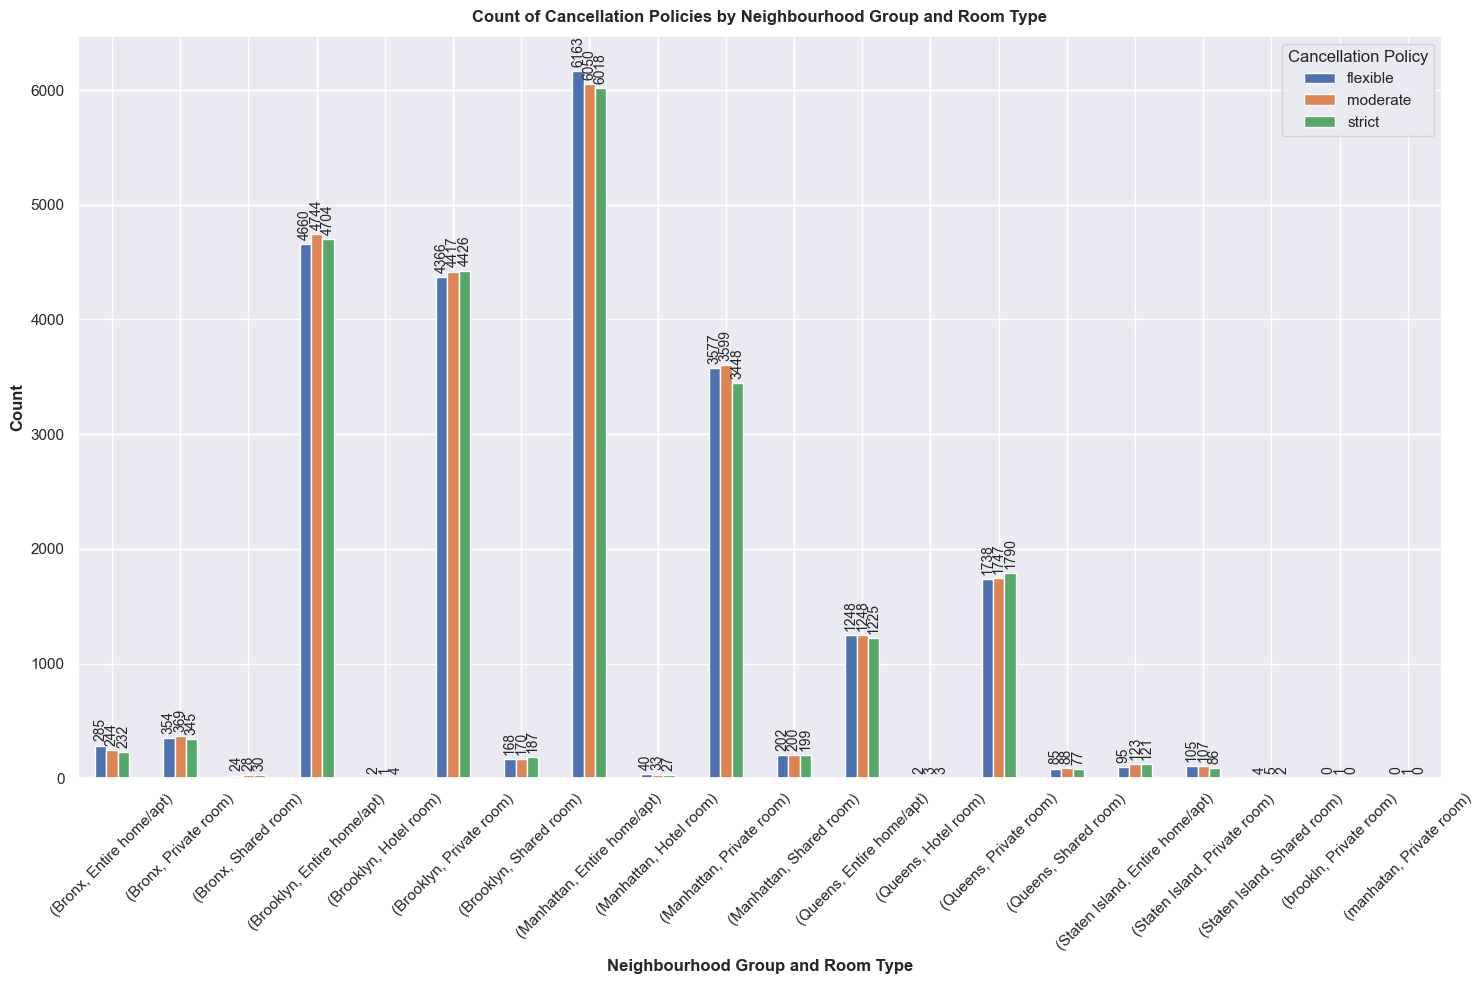

In [36]:
cancel_counts = df.groupby(['neighbourhood group', 'room type', 'cancellation_policy'])['cancellation_policy'].count().unstack()

# Plotting side-by-side bar chart
ax = cancel_counts.plot(kind='bar')
plt.title('Count of Cancellation Policies by Neighbourhood Group and Room Type')
plt.xlabel('Neighbourhood Group and Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Cancellation Policy')
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3, rotation=90)

plt.tight_layout()
plt.show()

In [37]:
df.to_csv('gold_file.csv')